In [1]:
#from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import hist, processor
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

import uproot
from matplotlib.colors import LogNorm
import mplhep as hep

from coffea.util import load
import pandas as pd

from pprint import pprint 
hep.style.use(hep.style.ROOT)

In [2]:
inputfile= "/eos/user/d/dvalsecc/Code/EcalTriggerDoubleWeights/ETTAnalyzer_output_Full.root"

In [3]:
inputfiles = "root://xrootd-cms.infn.it///store/group/phys_exotica/lq-LQ-lq/Test/double_weights/Run_359664/ETTAnalyzer_CMSSW_12_3_0_DoubleWeights_ReemulateFromGlobalTag/230228_184632/0000/ETTAnalyzer_output_Full_{0}.root"

In [4]:
df = uproot.lazy([inputfiles.format(i) for i in range(1, 3)], num_workers=4)

In [5]:
df

<Array [{runNb: 359532, evtNb: 113570, ... 0]}] type='13728 * {"runNb": uint32, ...'>

In [76]:
# Data created with https://github.com/CMS-ECAL-Trigger-Group/ETTAnalyzer/blob/main/ETTAnalyzer/plugins/ETTAnalyzer.cc

In [7]:
df.fields

['runNb',
 'evtNb',
 'bxNb',
 'orbitNb',
 'lumiBlock',
 'timeStamp',
 'nbOfTowers',
 'ieta',
 'iphi',
 'rawTPEmul3',
 'rawTPEmulttFlag3',
 'rawTPEmulsFGVB3',
 'rawTPEmulFineGrainBit3',
 'eRec',
 'eRec_avg',
 'crystNb',
 'maxRecHitEnergy',
 'sevlv',
 'time',
 'twrADC',
 'sFGVB',
 'FineGrainBit',
 'ttFlag',
 'TCCid',
 'TowerInTCC',
 'strip',
 'twrEmul3ADC']

In [ ]:
crystNb

In [80]:
df.bxNb

<Array [1328, 2036, 3124, ... 1185, 2903, 500] type='200 * uint32'>

In [75]:
df.eRec

<Array [[0.812, 1.11, -1.16, ... 0, 2.23, 1.9]] type='200 * var * float32'>

In [8]:
df.ieta

<Array [[-1, -1, -1, -1, ... 17, 17, 17, 17]] type='200 * var * int32'>

In [12]:
# Count number of tower for each event
ak.num(df.ieta, axis=1)

<Array [2448, 2448, 2448, ... 2448, 2448, 2448] type='200 * int64'>

Text(1, 0, 'ieta')

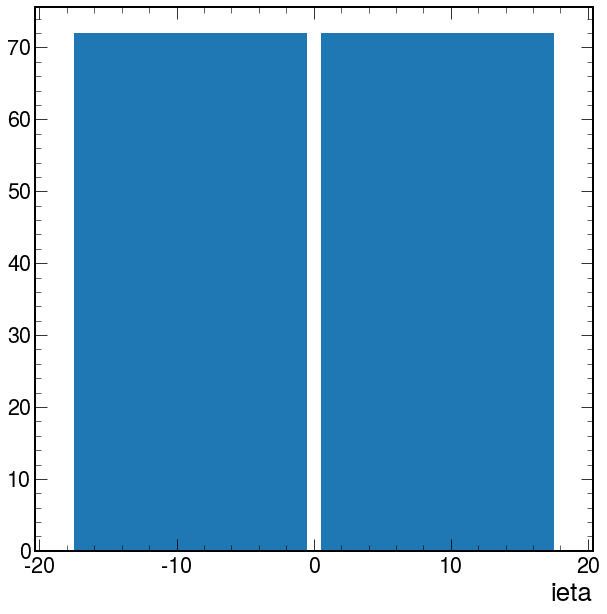

In [24]:
plt.hist(df.ieta[0], bins=37, range=(-18.5,18.5));
plt.xlabel("ieta")

In [29]:
df.iphi[0][-1]

72

Text(1, 0, 'phi')

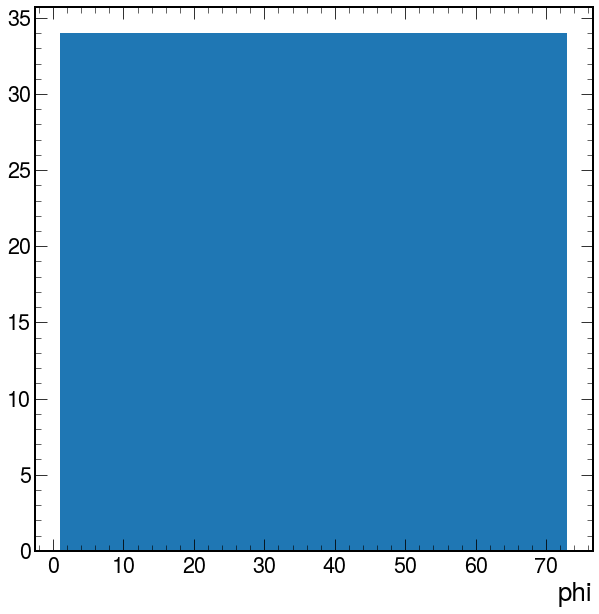

In [31]:
plt.hist(df.iphi[0], bins=72, range=(1, 73));
plt.xlabel("phi")

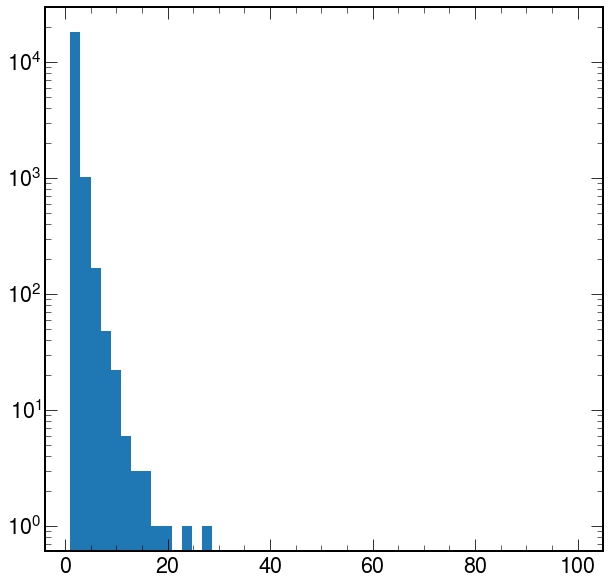

In [36]:
plt.hist(ak.flatten(df.twrADC), bins=50, range=(1, 100))
plt.yscale("log")

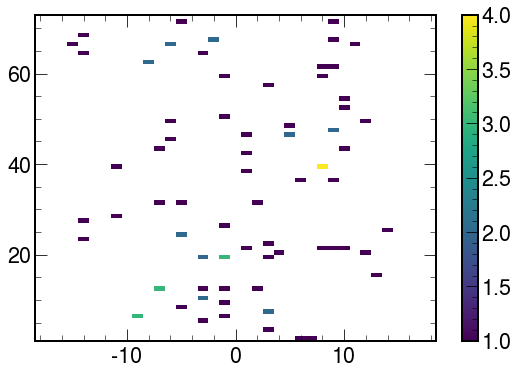

In [53]:
f = plt.figure(figsize=(9,6))
ax = plt.gca()
xedge, yedge, counts, H = ax.hist2d(df.ieta[0],df.iphi[0], weights=df.twrADC[0], 
          bins=(37, 72), range=((-18.5,18.5),(1, 73)),
          cmin=0.1);
plt.colorbar(H , ax=ax)

(exptext: Custom Text(0.0, 1, 'CMS'), expsuffix: Custom Text(0.0, 1.005, ''))

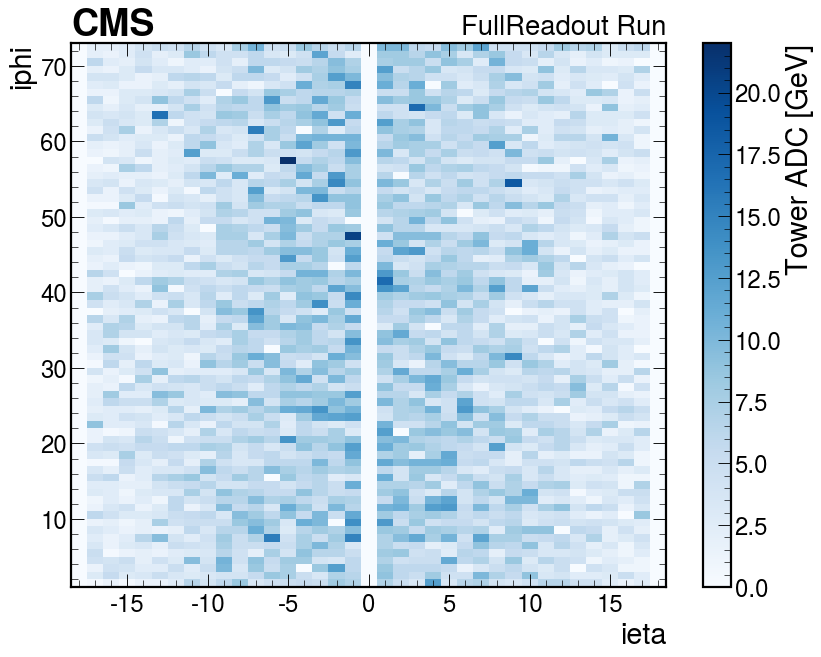

In [71]:
f = plt.figure(figsize=(12,9), dpi=80)
ax = plt.gca()
xedge, yedge, counts, H = ax.hist2d(
    ak.flatten(df.ieta),
    ak.flatten(df.iphi), 
    weights=ak.flatten(df.twrADC) * 0.5, 
    bins=(37, 72), range=((-18.5,18.5),(1, 73)),
    cmin=0, cmap="Blues");
plt.colorbar(H , ax=ax, label="Tower ADC [GeV]")

ax.set_xlabel("ieta")
ax.set_ylabel("iphi")
hep.cms.label(llabel="", rlabel="FullReadout Run", loc=0, ax=ax)

In [82]:
df.sFGVB

<Array [[0, 0, 0, 0, 0, 0, ... 0, 0, 1, 0, 0]] type='200 * var * int32'>

(exptext: Custom Text(0.0, 1, 'CMS'), expsuffix: Custom Text(0.0, 1.005, ''))

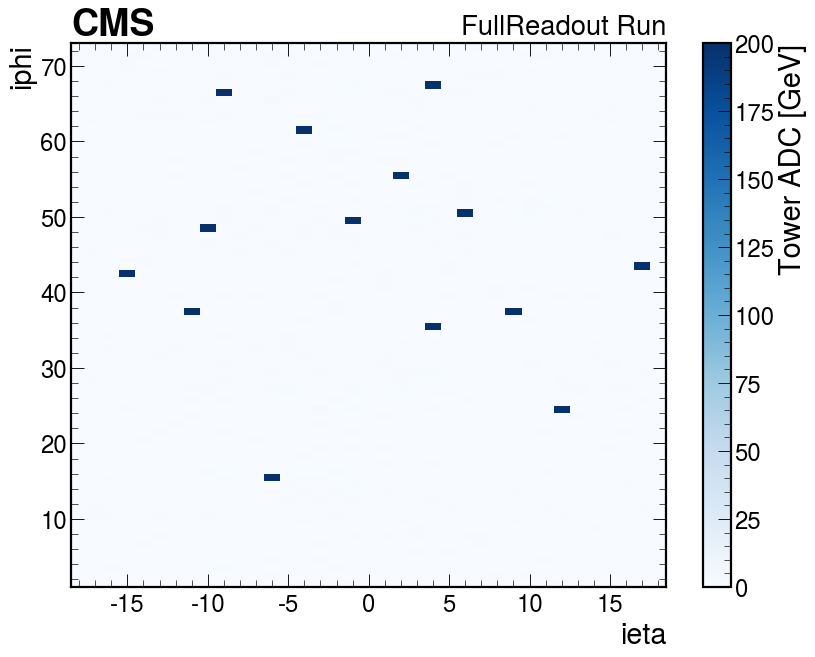

In [84]:
f = plt.figure(figsize=(12,9), dpi=80)
ax = plt.gca()
xedge, yedge, counts, H = ax.hist2d(
    ak.flatten(df.ieta),
    ak.flatten(df.iphi), 
    weights= ak.flatten(df.sFGVB), 
    bins=(37, 72), range=((-18.5,18.5),(1, 73)),
    cmin=0, cmap="Blues");
plt.colorbar(H , ax=ax, label="Tower ADC [GeV]")

ax.set_xlabel("ieta")
ax.set_ylabel("iphi")
hep.cms.label(llabel="", rlabel="FullReadout Run", loc=0, ax=ax)

(exptext: Custom Text(0.0, 1, 'CMS'), expsuffix: Custom Text(0.0, 1.005, ''))

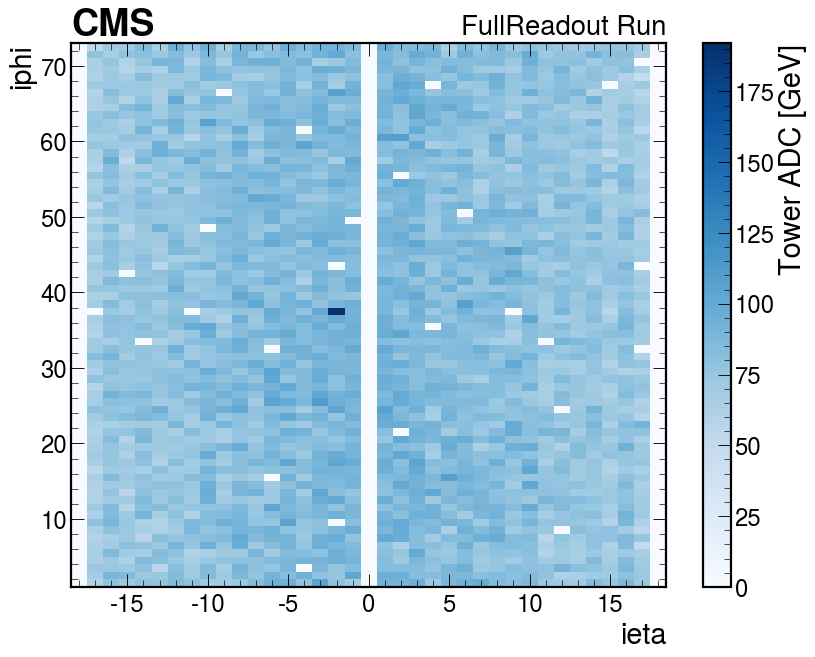

In [85]:
f = plt.figure(figsize=(12,9), dpi=80)
ax = plt.gca()
xedge, yedge, counts, H = ax.hist2d(
    ak.flatten(df.ieta),
    ak.flatten(df.iphi), 
    weights= ak.flatten(df.FineGrainBit), 
    bins=(37, 72), range=((-18.5,18.5),(1, 73)),
    cmin=0, cmap="Blues");
plt.colorbar(H , ax=ax, label="Tower ADC [GeV]")

ax.set_xlabel("ieta")
ax.set_ylabel("iphi")
hep.cms.label(llabel="", rlabel="FullReadout Run", loc=0, ax=ax)

(exptext: Custom Text(0.0, 1, 'CMS'), expsuffix: Custom Text(0.0, 1.005, ''))

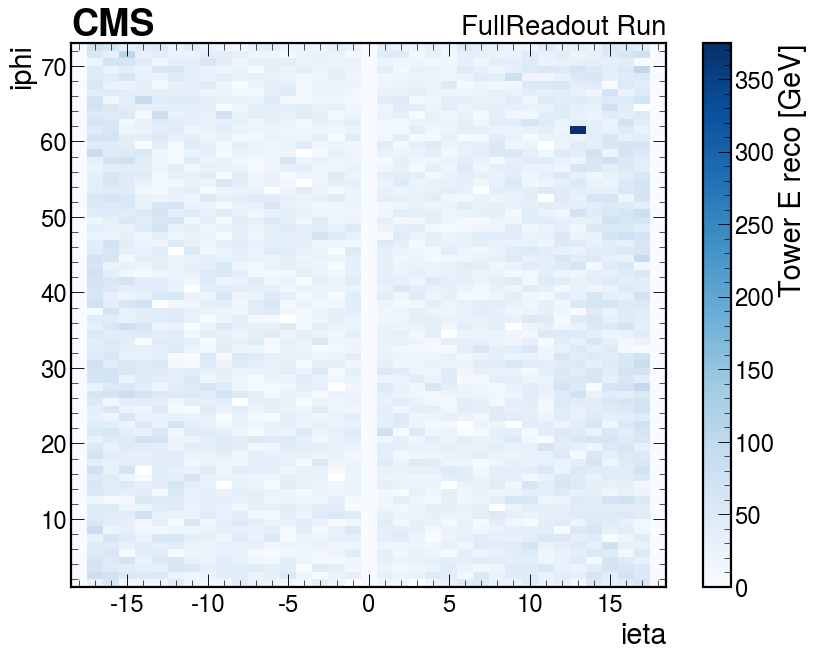

In [86]:
f = plt.figure(figsize=(12,9), dpi=80)
ax = plt.gca()
xedge, yedge, counts, H = ax.hist2d(
    ak.flatten(df.ieta),
    ak.flatten(df.iphi), 
    weights= ak.flatten(df.eRec), 
    bins=(37, 72), range=((-18.5,18.5),(1, 73)),
    cmin=0, cmap="Blues");
plt.colorbar(H , ax=ax, label="Tower E reco [GeV]")

ax.set_xlabel("ieta")
ax.set_ylabel("iphi")
hep.cms.label(llabel="", rlabel="FullReadout Run", loc=0, ax=ax)

(array([4.84078e+05, 0.00000e+00, 4.64000e+02, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 5.80000e+01, 0.00000e+00, 5.00000e+03]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

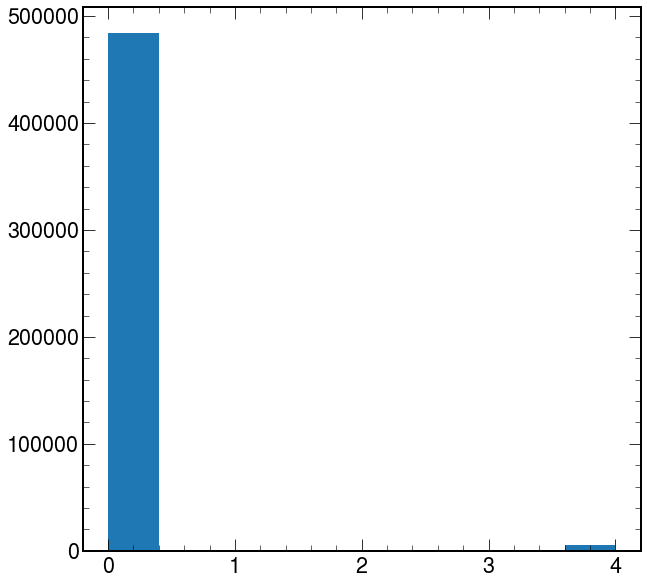

In [90]:
plt.hist(ak.flatten(df.ttFlag))

(exptext: Custom Text(0.0, 1, 'CMS'), expsuffix: Custom Text(0.0, 1.005, ''))

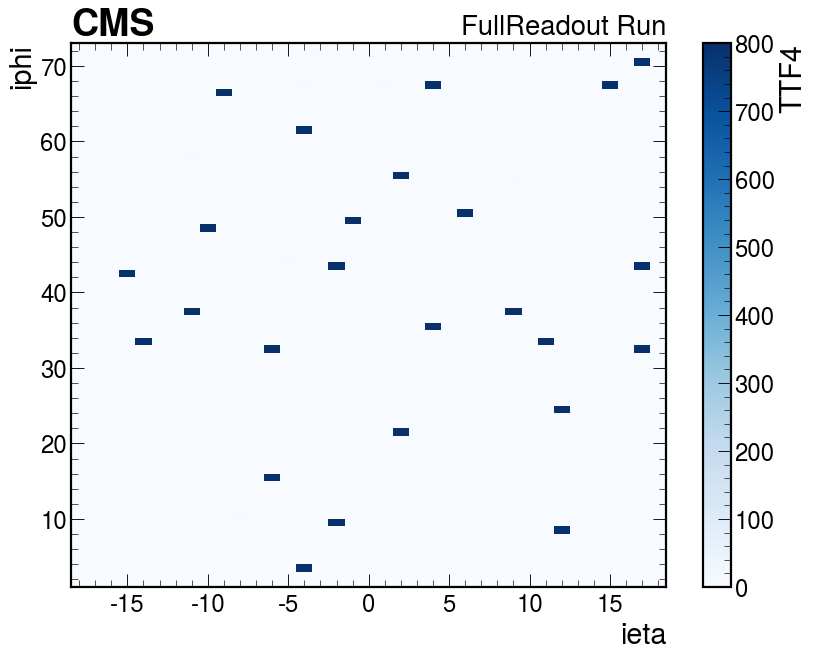

In [93]:
f = plt.figure(figsize=(12,9), dpi=80)
ax = plt.gca()
xedge, yedge, counts, H = ax.hist2d(
    ak.flatten(df.ieta),
    ak.flatten(df.iphi), 
    weights= ak.flatten(df.ttFlag), 
    bins=(37, 72), range=((-18.5,18.5),(1, 73)),
    cmin=0, cmap="Blues");
plt.colorbar(H , ax=ax, label="TTF4")

ax.set_xlabel("ieta")
ax.set_ylabel("iphi")
hep.cms.label(llabel="", rlabel="FullReadout Run", loc=0, ax=ax)

(exptext: Custom Text(0.0, 1, 'CMS'), expsuffix: Custom Text(0.0, 1.005, ''))

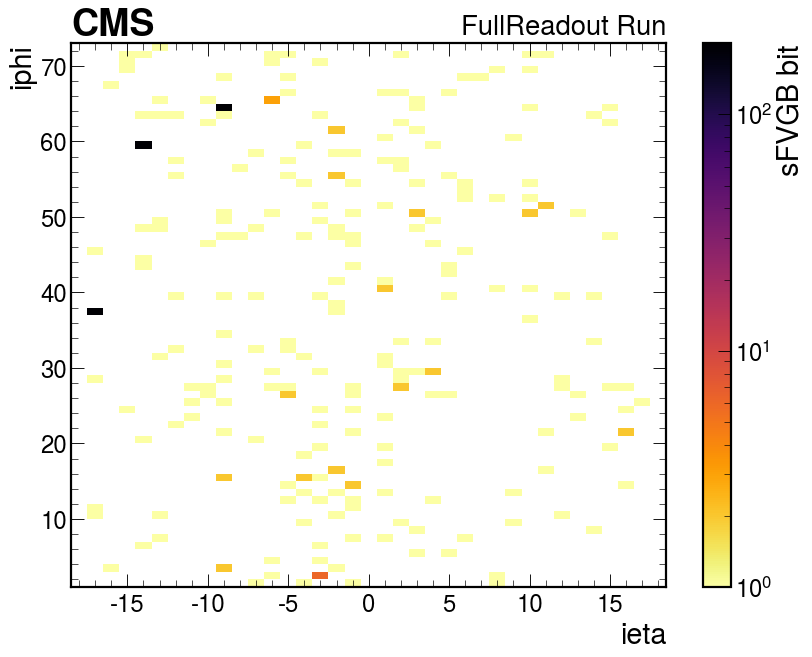

In [100]:
f = plt.figure(figsize=(12,9), dpi=80)
ax = plt.gca()
xedge, yedge, counts, H = ax.hist2d(
    ak.flatten(df.ieta[df.ttFlag==0]),
    ak.flatten(df.iphi[df.ttFlag==0]), 
    weights= ak.flatten(df.sFGVB[df.ttFlag==0]), 
    bins=(37, 72), range=((-18.5,18.5),(1, 73)),
    cmap="inferno_r", norm=LogNorm());
plt.colorbar(H , ax=ax, label="sFVGB bit")

ax.set_xlabel("ieta")
ax.set_ylabel("iphi")
hep.cms.label(llabel="", rlabel="FullReadout Run", loc=0, ax=ax)

In [102]:
df.sevlv

<Array [[1, 0, 0, 0, 0, ... 1, 1, -999, 1, 1]] type='200 * var * int32'>

(array([  4599.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 485001.]),
 array([-999. , -898.7, -798.4, -698.1, -597.8, -497.5, -397.2, -296.9,
        -196.6,  -96.3,    4. ]),
 <BarContainer object of 10 artists>)

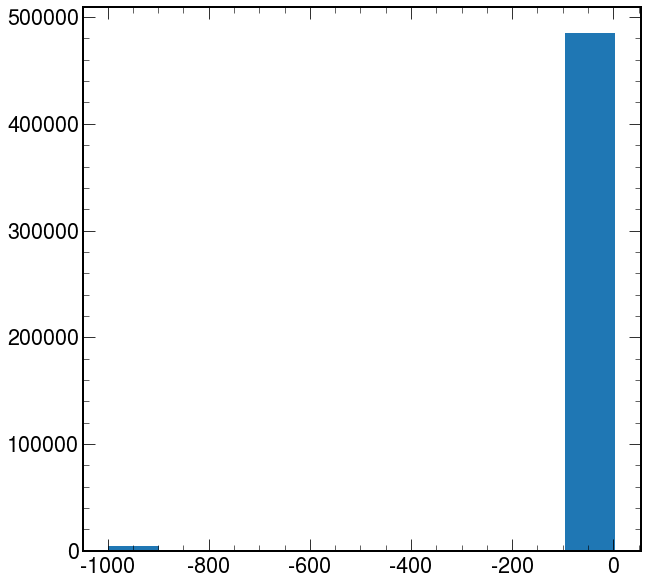

In [101]:
plt.hist(ak.flatten(df.sevlv))

Text(0, 1, 'TP emulator ADC')

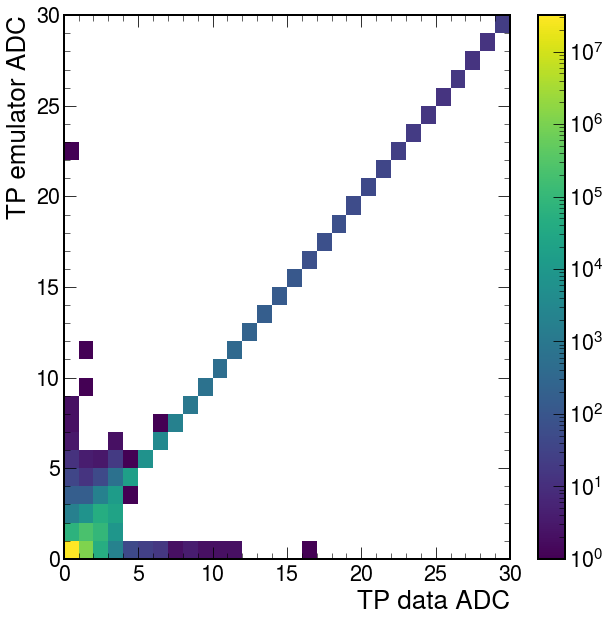

In [8]:
plt.hist2d(ak.flatten(df.twrADC),
            ak.flatten(df.twrEmul3ADC),
          bins=30, range=((0,30), (0,30)), cmin=1, 
          norm=LogNorm());
plt.colorbar()
plt.xlabel("TP data ADC")
plt.ylabel("TP emulator ADC")

Text(0, 1, 'TP emulator ADC')

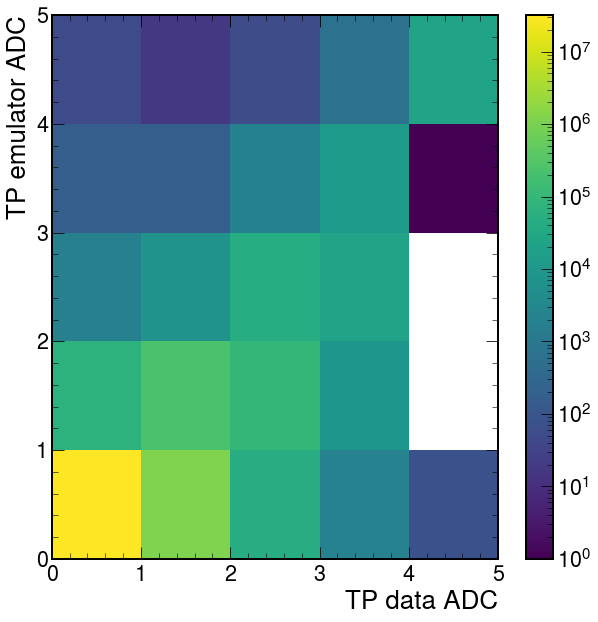

In [7]:
plt.hist2d(ak.flatten(df.twrADC),
            ak.flatten(df.twrEmul3ADC),
          bins=5, range=((0,5), (0,5)), cmin=1, 
          norm=LogNorm());
plt.colorbar()
plt.xlabel("TP data ADC")
plt.ylabel("TP emulator ADC")

Text(0, 1, 'TP emulator ADC')

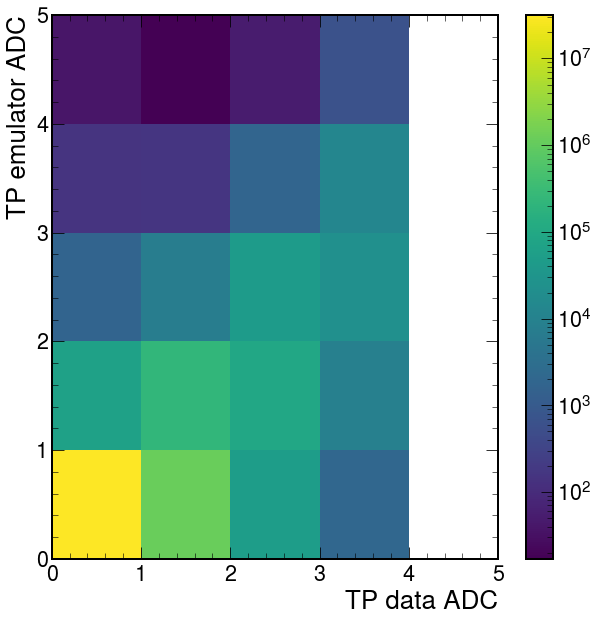

In [6]:
mask = (df.ttFlag==0)

plt.hist2d(ak.flatten(df.twrADC[mask]),
            ak.flatten(df.twrEmul3ADC[mask]),
          bins=5, range=((0,5), (0,5)), cmin=1, 
          norm=LogNorm());
plt.colorbar()
plt.xlabel("TP data ADC")
plt.ylabel("TP emulator ADC")